# visualising in low do=imensi

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
f = open('zomato.csv',"rb")
df = pickle.load(f)

In [6]:
df_delhi = df.copy()[df['City'] == 'New Delhi']

#df_delhi.head()

In [8]:
# removing the unnecessary columns 

df_delhi = df_delhi.iloc[:,[1,5,7,8,9,10,12,13,14,15,16,17,18,19,20]]
#df_delhi.set_index("Restaurant Name", inplace = True)

In [5]:
df_delhi.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,Food Cloud,Aaya Nagar,0.000000,0.000000,Cuisine Varies,500,No,No,No,No,2,0.0,White,Not rated,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,No,Yes,No,No,1,3.2,Orange,Average,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,No,No,No,No,2,2.6,Orange,Average,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,No,No,2,3.4,Orange,Average,238


In [9]:
missing_lats = np.where(df_delhi['Latitude'] == 0)[0]
missing_longs = np.where(df_delhi['Longitude'] == 0)[0]

# get the localities where we dont have the cordinate
# repplace the true cordinate if the locality is present in other obs 
# ele impute using median
localities = list(df_delhi.iloc[missing_lats,1])

#print(len(localities.unique()))
#print(len(df_delhi['Locality'].unique()))

# for loc in localities:
#     df_delhi[df_delhi['Locality'] == loc,:]
#localities.drop_index(inplace = True)
# localities
# df_delhi.Locality in localities
# #df_delhi[df_delhi.Locality in localities]

lat_med = np.median(df_delhi['Latitude'])
lon_med = np.median(df_delhi['Longitude'])
# df_delhi.iloc[missing_lats,3] = lat_med
# df_delhi.iloc[missing_lats,4] = lon_med
print(lon_med)
# df_delhi.iloc[missing_lats,3]

# for obs in missing_lats:
#     print(df_delhi.iloc[obs,3])
#     df_delhi.iloc[obs, 3] = lat_med
# #     print(df_delhi.iloc[obs,3])
    
df_delhi.Latitude.replace(0,lat_med,inplace = True)
df_delhi.iloc[missing_lats,:]

df_delhi.Longitude.replace(0,lon_med,inplace = True)

df_delhi.head()

#missing_lats = np.where(df_delhi['Latitude'] == 0)[0]

#print(missing_lats)

77.20421


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,Food Cloud,Aaya Nagar,77.204210,28.621372,Cuisine Varies,500,No,No,No,No,2,0.0,White,Not rated,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,No,Yes,No,No,1,3.2,Orange,Average,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,No,No,No,No,2,2.6,Orange,Average,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,No,No,2,3.4,Orange,Average,238


In [10]:
np.where(df_delhi['Latitude'] > 34)

df_delhi.Latitude.replace(35, lat_med, inplace = True)
df_delhi.Longitude.replace(34, lon_med, inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

vars = [6,7,8,9]

for var in vars:
    #df_delhi.iloc[:,var] = df_delhi.iloc[:,var].astype('str')
    #print(df_delhi.iloc[:,var].head(10))
    df_delhi.iloc[:, var] = le.fit_transform(df_delhi.iloc[:,var])

df_delhi.head(10)


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,Food Cloud,Aaya Nagar,77.204210,28.621372,Cuisine Varies,500,0,0,0,0,2,0.0,White,Not rated,2
2561,Burger.in,Adchini,77.196923,28.535382,Fast Food,350,0,1,0,0,1,3.2,Orange,Average,46
2562,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,1,1,0,0,3,3.4,Orange,Average,45
2563,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",500,0,0,0,0,2,2.6,Orange,Average,11
2564,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,0,1,0,0,2,3.4,Orange,Average,238
2565,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,400,0,0,0,0,1,3.1,Orange,Average,8
2566,Say Cheese,Adchini,77.198159,28.537448,Fast Food,400,0,1,0,0,1,2.7,Orange,Average,64
2567,Southy,Adchini,77.197950,28.537474,South Indian,450,0,1,0,0,1,2.6,Orange,Average,113
2568,Monosoz,Adchini,77.198042,28.538394,Pizza,300,0,1,0,0,1,3.7,Yellow,Good,66
2569,Waves,Adchini,77.198808,28.538666,"North Indian, Chinese",1500,1,1,0,0,3,3.5,Yellow,Good,141


In [13]:
cuisines = df_delhi.Cuisines

cuisines_list = []

# separating each cuisine in multicuisine restaurants and collecting them in a list

for word in cuisines:
    cuisines_list.append(word.split(','))
    
#cuisines_list

# making a dictionary out of unique cuisines
# this can be used to visualize the distribution of cuisines

cuisine_corpus = []

for x in cuisines:
    xs = x.split(',')
    cuisine_corpus.extend(xs)

cuisine_corpus = [x.strip() for x in cuisine_corpus]

cuisine_corpus_set = set(cuisine_corpus)

cuisine_dict = {ix:name for ix,name in enumerate(cuisine_corpus_set)}
cuisine_dict_reverse = {name:ix for ix,name in enumerate(cuisine_corpus_set)}

ids = []
for cui in cuisines_list:
    cui_list = []
    for cuis in cui:
        cuis = cuis.strip()
        idx = list(cuisine_dict.values()).index(cuis)
        #print(idx)
        cui_list.append(idx)
        #print(cui_list)
    ids.append(cui_list)

    
#print(ids)

# lists of list
one_hc = []

#
for x in ids:
    enc = [0]*len(cuisine_dict.values())
    for y in x:
        enc[y] = 1
    one_hc.append(enc)

#one_hc

In [14]:
cuisine_extracted = np.array(one_hc)
cuisine_extracted.shape


cuisine_vars = pd.DataFrame(cuisine_extracted, columns = cuisine_dict_reverse.keys())                  

In [16]:
df_zomato = pd.concat([cuisine_vars.reset_index(drop = True), 
                                    df_delhi.drop(columns = ['Cuisines'],axis = 1).reset_index(drop = True)], axis = 1)
#df_delhi_cuisine_price.reset_index(drop = True)
df_zomato.head()

,Mithai,Juices,Kerala,North Indian,Awadhi,Lebanese,Pizza,Tibetan,Iranian,Japanese,...,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,0,0,0,0,0,0,0,0,0,...,500,0,0,0,0,2,0.0,White,Not rated,2
1,0,0,0,0,0,0,0,0,0,0,...,350,0,1,0,0,1,3.2,Orange,Average,46
2,0,0,0,1,0,0,0,0,0,0,...,1500,1,1,0,0,3,3.4,Orange,Average,45
3,0,0,0,1,0,0,0,0,0,0,...,500,0,0,0,0,2,2.6,Orange,Average,11
4,0,0,0,1,0,0,0,0,0,0,...,500,0,1,0,0,2,3.4,Orange,Average,238


In [21]:
X = df_zomato.drop(columns = ['Restaurant Name','Rating color','Rating text','Locality'],axis = 1).values

# MDS

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scale',StandardScaler()),
                ('mds',MDS(n_components = 2))])

X_new = pipe.fit_transform(X)

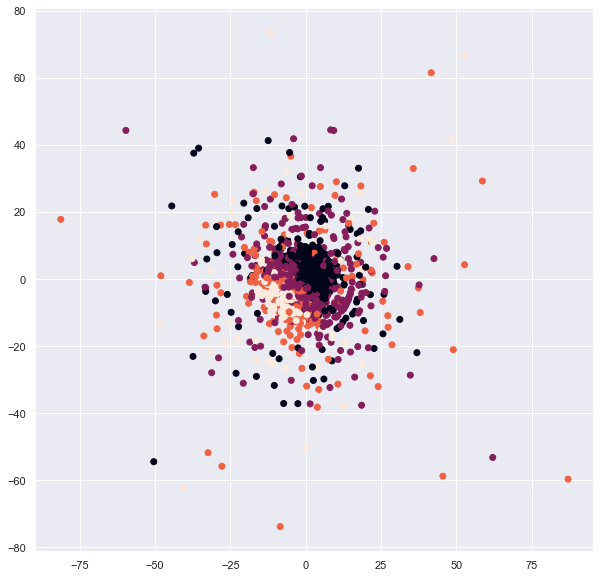

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

plt.figure(figsize = (10,10))
plt.scatter(X_new[:,0],X_new[:,1], c = df_zomato['Price range'])

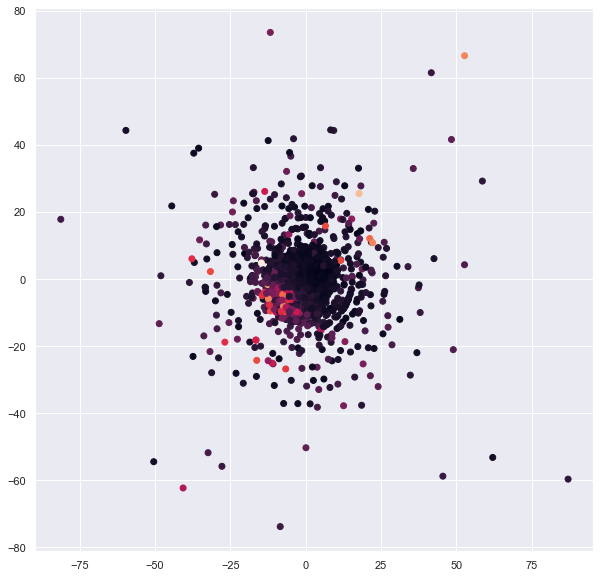

In [31]:
sns.set()
plt.figure(figsize = (10,10))
plt.scatter(X_new[:,0],X_new[:,1], c = df_zomato['Average Cost for two'])

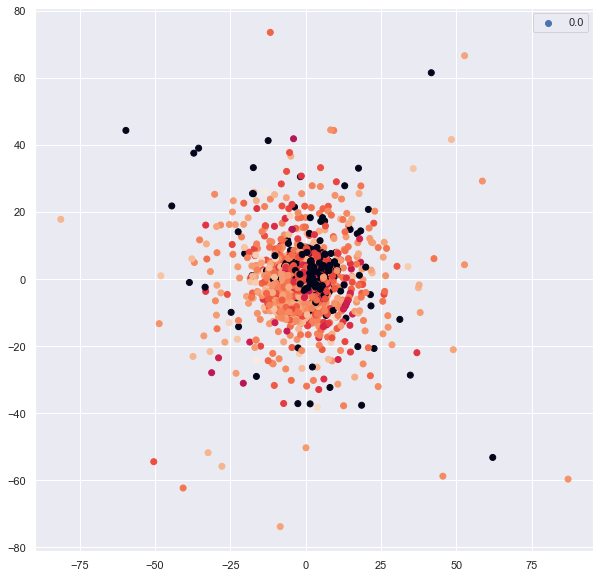

In [35]:
sns.set()
plt.figure(figsize = (10,10))
plt.scatter(X_new[:,0],X_new[:,1], c = df_zomato['Aggregate rating'])

# Locally Linear Embedding

In [36]:
from sklearn.manifold import LocallyLinearEmbedding

pipe = Pipeline([('scale',StandardScaler()),
                ('lle',LocallyLinearEmbedding(n_components = 2))])

X_new = pipe.fit_transform(X)


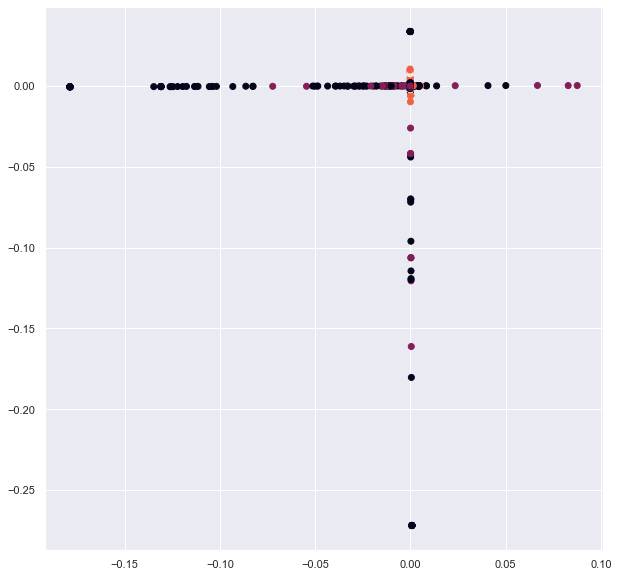

In [38]:
sns.set()

plt.figure(figsize = (10,10))
plt.scatter(X_new[:,0],X_new[:,1], c = df_zomato['Price range'])

# Isomap

In [39]:
from sklearn.manifold import Isomap

pipe = Pipeline([('scale',StandardScaler()),
                ('isomap',Isomap(n_components = 2))])

X_new = pipe.fit_transform(X)

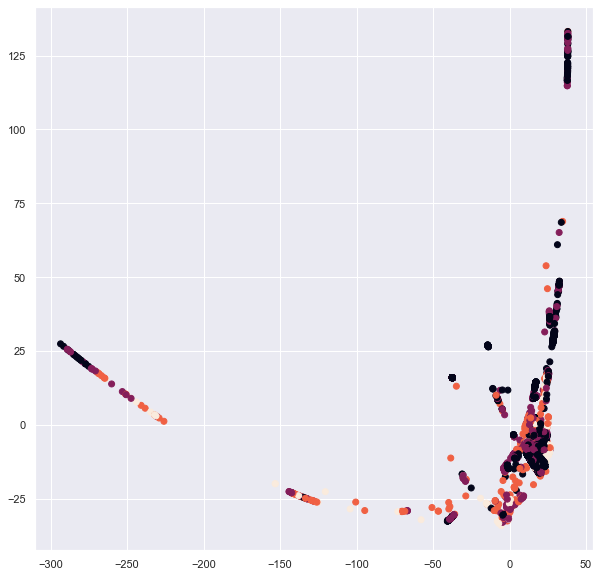

In [40]:
sns.set()

plt.figure(figsize = (10,10))
plt.scatter(X_new[:,0],X_new[:,1], c = df_zomato['Price range'])